In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
n = 64
M = np.zeros((n, n-1))
M[0, :] = 1
M[-1, :] = -1

def proc():
    for i in range(n):
        for j in range(n-1):
            if M[i][j] == 0:
                iPrev = (i - j - 1 + n) % n
                iNext = (i + j + 1 + n) % n

                valPrev = M[iPrev, j]
                valNext = M[iNext, j]

                if valPrev==0 and valNext==0:
                    pass # Do nothing
                elif valPrev != 0:
                    if valPrev == 1:
                        M[i][j] = -1
                    else:
                        M[i][j] = 1
                        M[iNext][j] = -1
                elif valNext != 0:
                    if valNext == -1:
                        M[i][j] = 1
                    else:
                        M[i][j] = -1
                        M[iPrev][j] = 1

def proc2():
    i=0
    Mold = np.zeros((n, n-1))
    while not np.sum(np.abs(Mold-M)) == 0:
        print(i)
        Mold = np.copy(M)
        proc()
        i += 1
        
def proc3():
    proc2()
    for i in range(n // 2 - 1):
        M[i+1][M[i+1] == 0] = 1
        M[-i-2][M[-i-2] == 0] = -1
        proc2()
        
def test():
    Mdig=np.zeros((n, n-1), dtype=int)
    for i in range(n):
        for j in range(n-1):
            Mdig[i, j] = (i + (j + 1) * M[i, j] + n) % n + 1
            
        assert len(set(Mdig[i])) == n-1
    print("Test Passed :)")
        
proc3()
test()

0
1
2
3
4
5
6
7
8
0
1
2
3
0
1
2
0
1
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Test Passed :)


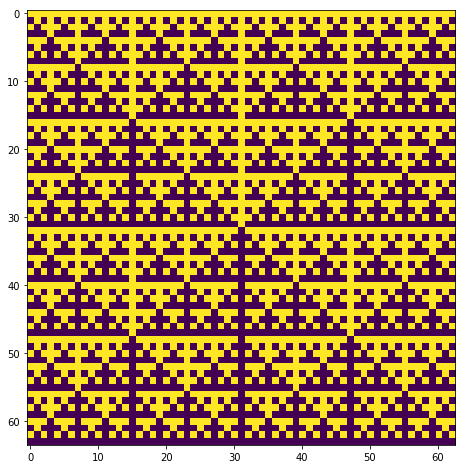

In [87]:
plt.figure(figsize=(8,8))
plt.imshow(M)
plt.show()

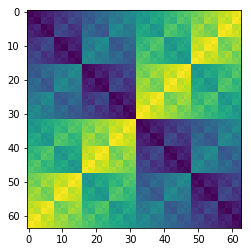

In [229]:
def gen():
    Mgen = np.zeros((n, n-1))
    for i in range(n):
        for j in range(n-1):
            #Mgen[i,j] = (i // (np.abs(n//2 - (j+1)))+1) % 2
#             Mgen[i,j] = (i % (j + 1)) % 2
            ui = n // 2 - i
            uj = n // 2 - j
            vi = 2 * np.abs(ui) + int(ui >= 0)
            vj = 2 * np.abs(uj) + int(uj >= 0)
            Mgen[i,j] = i ^ j
    return Mgen
            
plt.figure()
plt.imshow(gen())
plt.show() 